In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('drugsCom_raw.tsv',sep = '\t')

In [3]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [4]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [5]:
df.shape

(161297, 7)

In [6]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [7]:
condition1 = ['Depression','High Blood Pressure','Diabetes, Type 2']
df1=df[df['condition'].isin(condition1)]
df1

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [8]:
to_drop = ['Unnamed: 0','date']
df1 = df1.drop(to_drop, axis=1)

In [9]:
df1.reset_index(inplace = True, drop = True)
df1

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [11]:
df2 = df1

In [12]:
df2

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33


In [14]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [15]:
df2['review_c01'] = review_clean(df2['review'])

C:\Users\aniru\AppData\Local\Temp\ipykernel_21432\3584754075.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_21432\3584754075.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_21432\3584754075.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
C:\Users\aniru\AppData\Local\Temp\ipykernel_21432\3584754075.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_21432\3584754075.py:21: FutureWarning: The default val

In [19]:
df2

,drugName,condition,review,rating,usefulCount,review_c01
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,i have taken anti depressants for years with s...
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1 week on zoloft for anxiety and mood swings i...
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,my gp started me on venlafaxine yesterday to h...
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,hey guys its been 4 months since my last post ...
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,this medicine saved my life i was at my wits e...
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,it is fourth blood pressure pill for me it fee...
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,while on bystolic my feet and arms were numb m...
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,i just got diagnosed with type 2 my doctor pre...
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,this is the third med ive tried for anxiety an...


In [20]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [22]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df2['review_c02'] = df2['review_c01'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import nltk
from nltk.stem import WordNetLemmatizer
 
# Create WordNetLemmatizer object
wnlt = WordNetLemmatizer()

# sentence lemmatization examples
string = df2['review_c02'].loc[10]
 
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
#> ['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on',
#   'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
 
lemmatized_string = ' '.join([wnlt.lemmatize(words) for words in list2])
 
print(lemmatized_string)  
#> the cat is sitting with the bat on the striped mat under many flying goose

['genius', 'psychiatrist', 'started', 'drug', 'fall', '2008', 'first', 'weeks', 'felt', 'even', 'worse', 'started', 'taking', 'fluoxetine', 'many', 'months', 'drug', 'eventually', 'taking', '400mg', 'day', 'manic', 'thoughts', 'amp', 'episodes', 'psychiatrist', 'decided', 'bi', 'polar', 'started', 'seroquel', 'rather', 'give', 'break', 'nervous', 'system', 'adjust', 'natural', 'state', 'also', 'ended', 'taking', '6', 'months', 'dose', 'retrospect', 'wish', 'hadnt', 'taken', 'either', 'fluoxetine', 'prozac', 'seroquel', 'quetiapine']
genius psychiatrist started drug fall 2008 first week felt even worse started taking fluoxetine many month drug eventually taking 400mg day manic thought amp episode psychiatrist decided bi polar started seroquel rather give break nervous system adjust natural state also ended taking 6 month dose retrospect wish hadnt taken either fluoxetine prozac seroquel quetiapine


In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')
 
# Create a Doc object
doc = nlp(df2['review_c02'].loc[10])
 
# Create list of tokens from given string
tokens = []
for token in doc:
    tokens.append(token)
 
print(tokens)
#> [the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
 
lemmatized_sentence = " ".join([token.lemma_ for token in doc])
 
print(lemmatized_sentence)
#> the bat see the cat with good stripe hang upside down by -PRON- foot

[genius, psychiatrist, started, drug, fall, 2008, first, weeks, felt, even, worse, started, taking, fluoxetine, many, months, drug, eventually, taking, 400, mg, day, manic, thoughts, amp, episodes, psychiatrist, decided, bi, polar, started, seroquel, rather, give, break, nervous, system, adjust, natural, state, also, ended, taking, 6, months, dose, retrospect, wish, had, nt, taken, either, fluoxetine, prozac, seroquel, quetiapine]
genius psychiatrist start drug fall 2008 first week feel even bad started take fluoxetine many month drug eventually take 400 mg day manic thought amp episode psychiatrist decide bi polar start seroquel rather give break nervous system adjust natural state also end take 6 month dose retrospect wish have not take either fluoxetine prozac seroquel quetiapine


In [28]:
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

df2['review_c03'] = df2['review_c02'].apply(lambda x: ' '.join([lemmatize_word(word) for word in x.split()]))


In [29]:
df2

,drugName,condition,review,rating,usefulCount,review_c01,review_c02,review_c03
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,i have taken anti depressants for years with s...,taken anti depressants years improvement mostl...,taken anti depressant year improvement mostly ...
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1 week on zoloft for anxiety and mood swings i...,1 week zoloft anxiety mood swings take 50mg mo...,1 week zoloft anxiety mood swing take 50mg mor...
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,my gp started me on venlafaxine yesterday to h...,gp started venlafaxine yesterday help depressi...,gp started venlafaxine yesterday help depressi...
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,hey guys its been 4 months since my last post ...,hey guys 4 months since last post wanted give ...,hey guy 4 month since last post wanted give mo...
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,this medicine saved my life i was at my wits e...,medicine saved life wits end anti depressants ...,medicine saved life wit end anti depressant re...
...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,it is fourth blood pressure pill for me it fee...,fourth blood pressure pill feels like partly w...,fourth blood pressure pill feel like partly wo...
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,while on bystolic my feet and arms were numb m...,bystolic feet arms numb blood sugars became se...,bystolic foot arm numb blood sugar became seve...
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,i just got diagnosed with type 2 my doctor pre...,got diagnosed type 2 doctor prescribed invokan...,got diagnosed type 2 doctor prescribed invokan...
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,this is the third med ive tried for anxiety an...,third med ive tried anxiety mild depression we...,third med ive tried anxiety mild depression we...


In [30]:
to_drop = ['review','review_c01','review_c02']
df3 = df2.drop(to_drop, axis=1)

In [31]:
df3

,drugName,condition,rating,usefulCount,review_c03
0,L-methylfolate,Depression,10.0,54,taken anti depressant year improvement mostly ...
1,Sertraline,Depression,8.0,3,1 week zoloft anxiety mood swing take 50mg mor...
2,Venlafaxine,Depression,4.0,3,gp started venlafaxine yesterday help depressi...
3,Dulaglutide,"Diabetes, Type 2",10.0,24,hey guy 4 month since last post wanted give mo...
4,Effexor XR,Depression,10.0,166,medicine saved life wit end anti depressant re...
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,fourth blood pressure pill feel like partly wo...
13940,Bystolic,High Blood Pressure,1.0,25,bystolic foot arm numb blood sugar became seve...
13941,Invokana,"Diabetes, Type 2",9.0,47,got diagnosed type 2 doctor prescribed invokan...
13942,Vortioxetine,Depression,2.0,33,third med ive tried anxiety mild depression we...


In [32]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [34]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        # print (sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #
    return sent_score

In [35]:
df3['review_rate'] = df3['review_c03'].apply(calculate_sentiment)
df3

,drugName,condition,rating,usefulCount,review_c03,review_rate
0,L-methylfolate,Depression,10.0,54,taken anti depressant year improvement mostly ...,4
1,Sertraline,Depression,8.0,3,1 week zoloft anxiety mood swing take 50mg mor...,-5
2,Venlafaxine,Depression,4.0,3,gp started venlafaxine yesterday help depressi...,-3
3,Dulaglutide,"Diabetes, Type 2",10.0,24,hey guy 4 month since last post wanted give mo...,6
4,Effexor XR,Depression,10.0,166,medicine saved life wit end anti depressant re...,3
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,fourth blood pressure pill feel like partly wo...,-5
13940,Bystolic,High Blood Pressure,1.0,25,bystolic foot arm numb blood sugar became seve...,-4
13941,Invokana,"Diabetes, Type 2",9.0,47,got diagnosed type 2 doctor prescribed invokan...,4
13942,Vortioxetine,Depression,2.0,33,third med ive tried anxiety mild depression we...,-9


In [36]:
Dep01 = df3[df3['condition'].isin(['Depression'])]
Dep01

,drugName,condition,rating,usefulCount,review_c03,review_rate
0,L-methylfolate,Depression,10.0,54,taken anti depressant year improvement mostly ...,4
1,Sertraline,Depression,8.0,3,1 week zoloft anxiety mood swing take 50mg mor...,-5
2,Venlafaxine,Depression,4.0,3,gp started venlafaxine yesterday help depressi...,-3
4,Effexor XR,Depression,10.0,166,medicine saved life wit end anti depressant re...,3
5,Wellbutrin,Depression,4.0,15,started taking slept well night awoke early ar...,-7
...,...,...,...,...,...,...
13934,Zoloft,Depression,8.0,80,little two month taking 50mg zoloft feel happi...,12
13935,Rexulti,Depression,8.0,41,third week 05 mg add paxil first week thought ...,7
13936,Seroquel,Depression,10.0,36,seroquel several year helped greatly symptom r...,5
13938,Sertraline,Depression,3.0,6,taking wellbutrin depression stopped working d...,-4


In [37]:
# Top 10 drugs by higest review rate  
Dep01['review_rate'].sort_values(ascending = False).head(10)

1127     30
7696     30
8142     27
8103     27
8946     27
2922     25
11417    23
92       23
5874     22
6558     22
Name: review_rate, dtype: int64

In [38]:
df3.loc[1127]

drugName                                              Trintellix
condition                                             Depression
rating                                                      10.0
usefulCount                                                  128
review_c03     december 2016 started 5mg trintellix id reache...
review_rate                                                   30
Name: 1127, dtype: object

In [39]:
print (df2['review'].loc[1127])

"December 2016 I started on 5mg of Trintellix. I&#039;d reached a point in life, 65, where my life was more than I could ask for: good job, strong marriage, good friends, healthy, and yet I lived a dark cloud of fatigue and disconnection, lacking excitement and motivation. I was just maintaining. So I tried Trintellix. I&#039;m now on 10mg. For me I&#039;ve had little to no symptoms, and a rebirth of joy, motivation, and creativity. I&#039;ve also added a weekly exercise routine at the local Planet Fitness. Between diet and exercise I find this modern medicine to be a miracle. Of course I realize my body will probably adjust to this feeling and I wont&#039; be quite &#039;euphoric&#039; forever, but I now know what feeling good feels like."


## Top 3 drugs based on user review 

### Depression : 
Trintellix
Vortioxetine
Duloxetine

### Dibetic Type 2 : 
Liraglutide
Victoza
Bydureon
Invokana
Canagliflozin

### High Blood Pressure : 
Amlodipine / olmesartan
Azor
Hydrochlorothiazide / olmesartan
Lisinopril
Amlodipine

## Part 2 : Predicting the condition based on the customer input 

In [40]:
df4 = pd.DataFrame(df3)
df4

,drugName,condition,rating,usefulCount,review_c03,review_rate
0,L-methylfolate,Depression,10.0,54,taken anti depressant year improvement mostly ...,4
1,Sertraline,Depression,8.0,3,1 week zoloft anxiety mood swing take 50mg mor...,-5
2,Venlafaxine,Depression,4.0,3,gp started venlafaxine yesterday help depressi...,-3
3,Dulaglutide,"Diabetes, Type 2",10.0,24,hey guy 4 month since last post wanted give mo...,6
4,Effexor XR,Depression,10.0,166,medicine saved life wit end anti depressant re...,3
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,fourth blood pressure pill feel like partly wo...,-5
13940,Bystolic,High Blood Pressure,1.0,25,bystolic foot arm numb blood sugar became seve...,-4
13941,Invokana,"Diabetes, Type 2",9.0,47,got diagnosed type 2 doctor prescribed invokan...,4
13942,Vortioxetine,Depression,2.0,33,third med ive tried anxiety mild depression we...,-9


In [41]:
df5 = pd.DataFrame(df4[['condition','review_c03']])
df5

,condition,review_c03
0,Depression,taken anti depressant year improvement mostly ...
1,Depression,1 week zoloft anxiety mood swing take 50mg mor...
2,Depression,gp started venlafaxine yesterday help depressi...
3,"Diabetes, Type 2",hey guy 4 month since last post wanted give mo...
4,Depression,medicine saved life wit end anti depressant re...
...,...,...
13939,High Blood Pressure,fourth blood pressure pill feel like partly wo...
13940,High Blood Pressure,bystolic foot arm numb blood sugar became seve...
13941,"Diabetes, Type 2",got diagnosed type 2 doctor prescribed invokan...
13942,Depression,third med ive tried anxiety mild depression we...


In [43]:
x=df5['review_c03']
y=df5['condition']

In [44]:
### Understadning various Word vectorization techniques 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2, random_state=0)
# Divided the data in 80:20 format for test and train 

In [47]:
x_train.shape

(11155,)

In [48]:
x_test.shape

(2789,)

In [49]:
y_train

13030    High Blood Pressure
13739             Depression
11037             Depression
6006              Depression
2284              Depression
                ...         
5724              Depression
174               Depression
8606        Diabetes, Type 2
2684     High Blood Pressure
13561       Diabetes, Type 2
Name: condition, Length: 11155, dtype: object

In [ ]:
### Bag of Words Model

In [50]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [51]:
### TF-IDF

In [52]:
### TF-IDF : Unigram
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [53]:
### TF-IDF : Bigram
tfidf2_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf2_train = tfidf2_vectorizer.fit_transform(x_train)
tfidf2_test = tfidf2_vectorizer.transform(x_test)

In [54]:
### TF-IDF : Trigram
tfidf3_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf3_train = tfidf2_vectorizer.fit_transform(x_train)
tfidf3_test = tfidf2_vectorizer.transform(x_test)

## Machine Learning Models 

In [55]:
# Code to get good visual for confusion matrix 

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
df5['condition'].isin(['Depression']).value_counts()

True     9069
False    4875
Name: condition, dtype: int64

In [59]:
df5['condition'].isin(['High Blood Pressure']).value_counts()

False    11623
True      2321
Name: condition, dtype: int64

In [60]:
df5['condition'].isin(['Diabetes, Type 2']).value_counts()

False    11390
True      2554
Name: condition, dtype: int64

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

accuracy:   0.957
Confusion matrix, without normalization


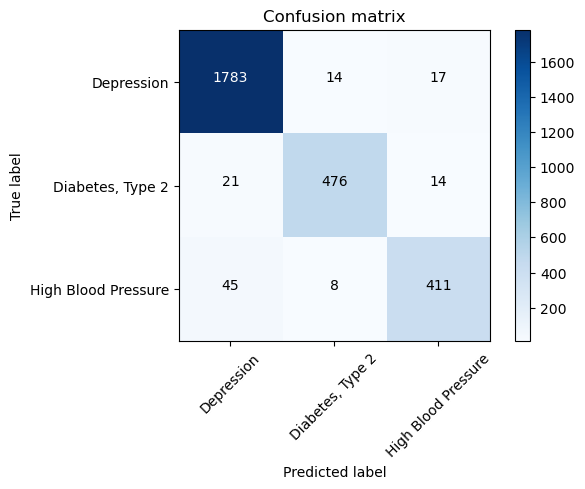

In [62]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.897
Confusion matrix, without normalization


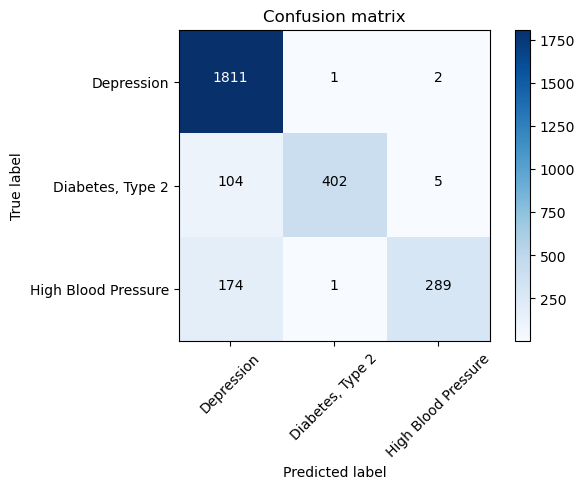

In [63]:
mnb = MultinomialNB()
mnb.fit(tfidf_train, y_train)
pred = mnb.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.772
Confusion matrix, without normalization


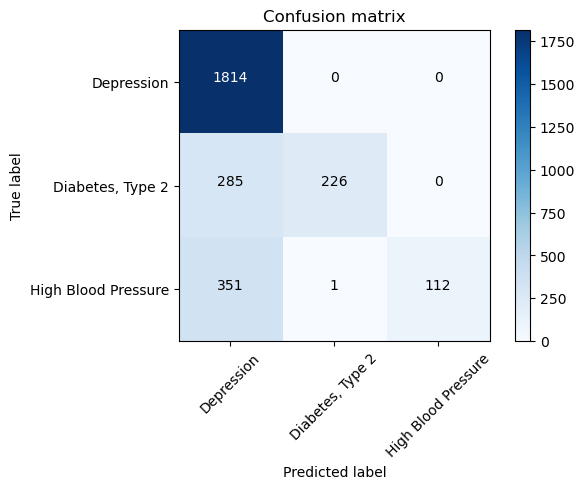

In [64]:
mnb = MultinomialNB()
mnb.fit(tfidf2_train, y_train)
pred = mnb.predict(tfidf2_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.772
Confusion matrix, without normalization


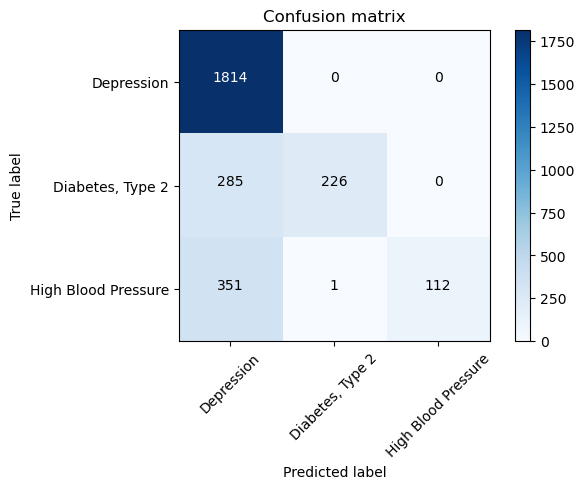

In [65]:
mnb = MultinomialNB()
mnb.fit(tfidf3_train, y_train)
pred = mnb.predict(tfidf3_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [66]:
from sklearn.linear_model import PassiveAggressiveClassifier

accuracy:   0.949
Confusion matrix, without normalization


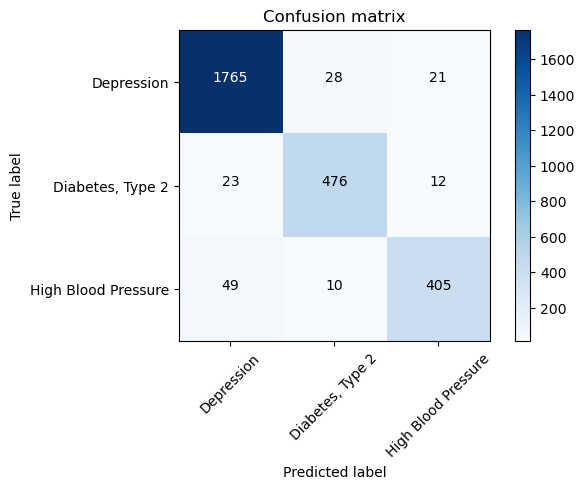

In [67]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.962
Confusion matrix, without normalization


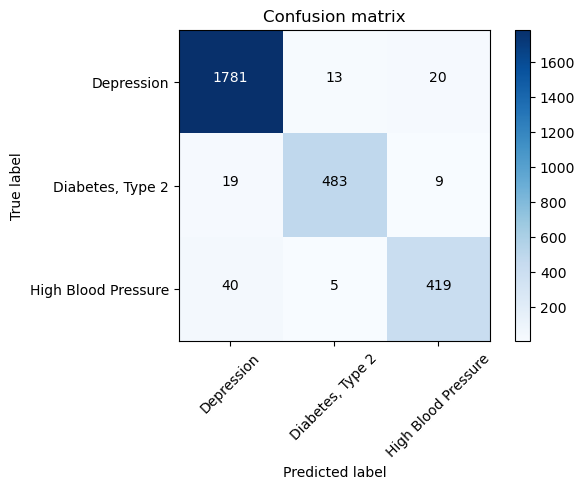

In [68]:
passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train, y_train)
pred = passive.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.968
Confusion matrix, without normalization


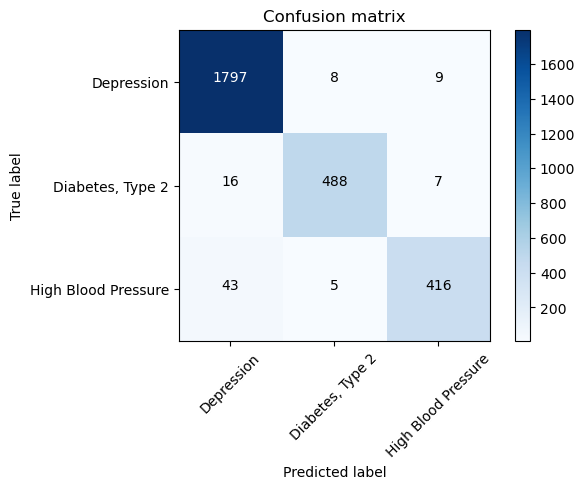

In [69]:
passive = PassiveAggressiveClassifier()
passive.fit(tfidf2_train, y_train)
pred = passive.predict(tfidf2_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.969
Confusion matrix, without normalization


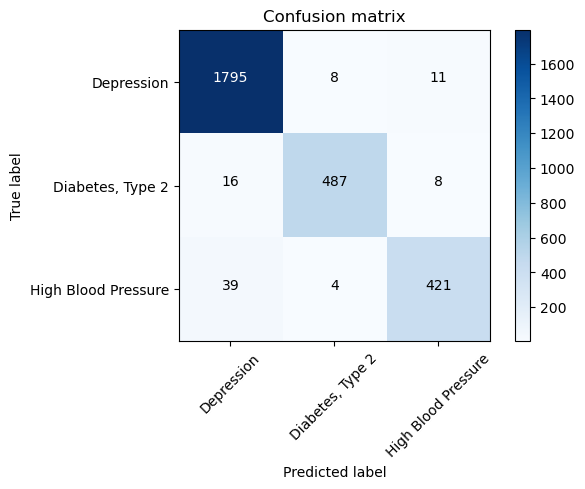

In [73]:
passive = PassiveAggressiveClassifier()
passive.fit(tfidf3_train, y_train)
pred = passive.predict(tfidf3_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [76]:
import pickle

In [78]:
with open('pass_tf.pkl', 'wb') as file:
    pickle.dump(passive, file)

with open('tfidf3_vectorizer.pkl', 'wb') as file:
    pickle.dump(count_vectorizer, file)